In [97]:
dataset = sm.datasets.get_rdataset("clouds", package="HSAUR")
df = dataset.data
df.tail()

,seeding,time,sne,cloudcover,prewetness,echomotion,rainfall
19,yes,59,3.40,6.5,0.142,stationary,5.45
20,yes,65,3.15,3.1,0.073,moving,2.02
21,no,68,3.15,2.6,0.136,moving,0.82
22,yes,82,4.01,8.3,0.123,moving,1.09
23,no,83,4.65,7.4,0.168,moving,0.28


In [100]:
formula_first = "rainfall ~ " + \
"(scale(time) + scale(sne) + scale(cloudcover) + scale(prewetness) + echomotion)"

model_first = sm.OLS.from_formula(formula_first, data = df)
result_first = model_first.fit()
print(result_first.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     2.019
Date:                Sat, 23 May 2020   Prob (F-statistic):              0.124
Time:                        11:35:18   Log-Likelihood:                -55.426
No. Observations:                  24   AIC:                             122.9
Df Residuals:                      18   BIC:                             129.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

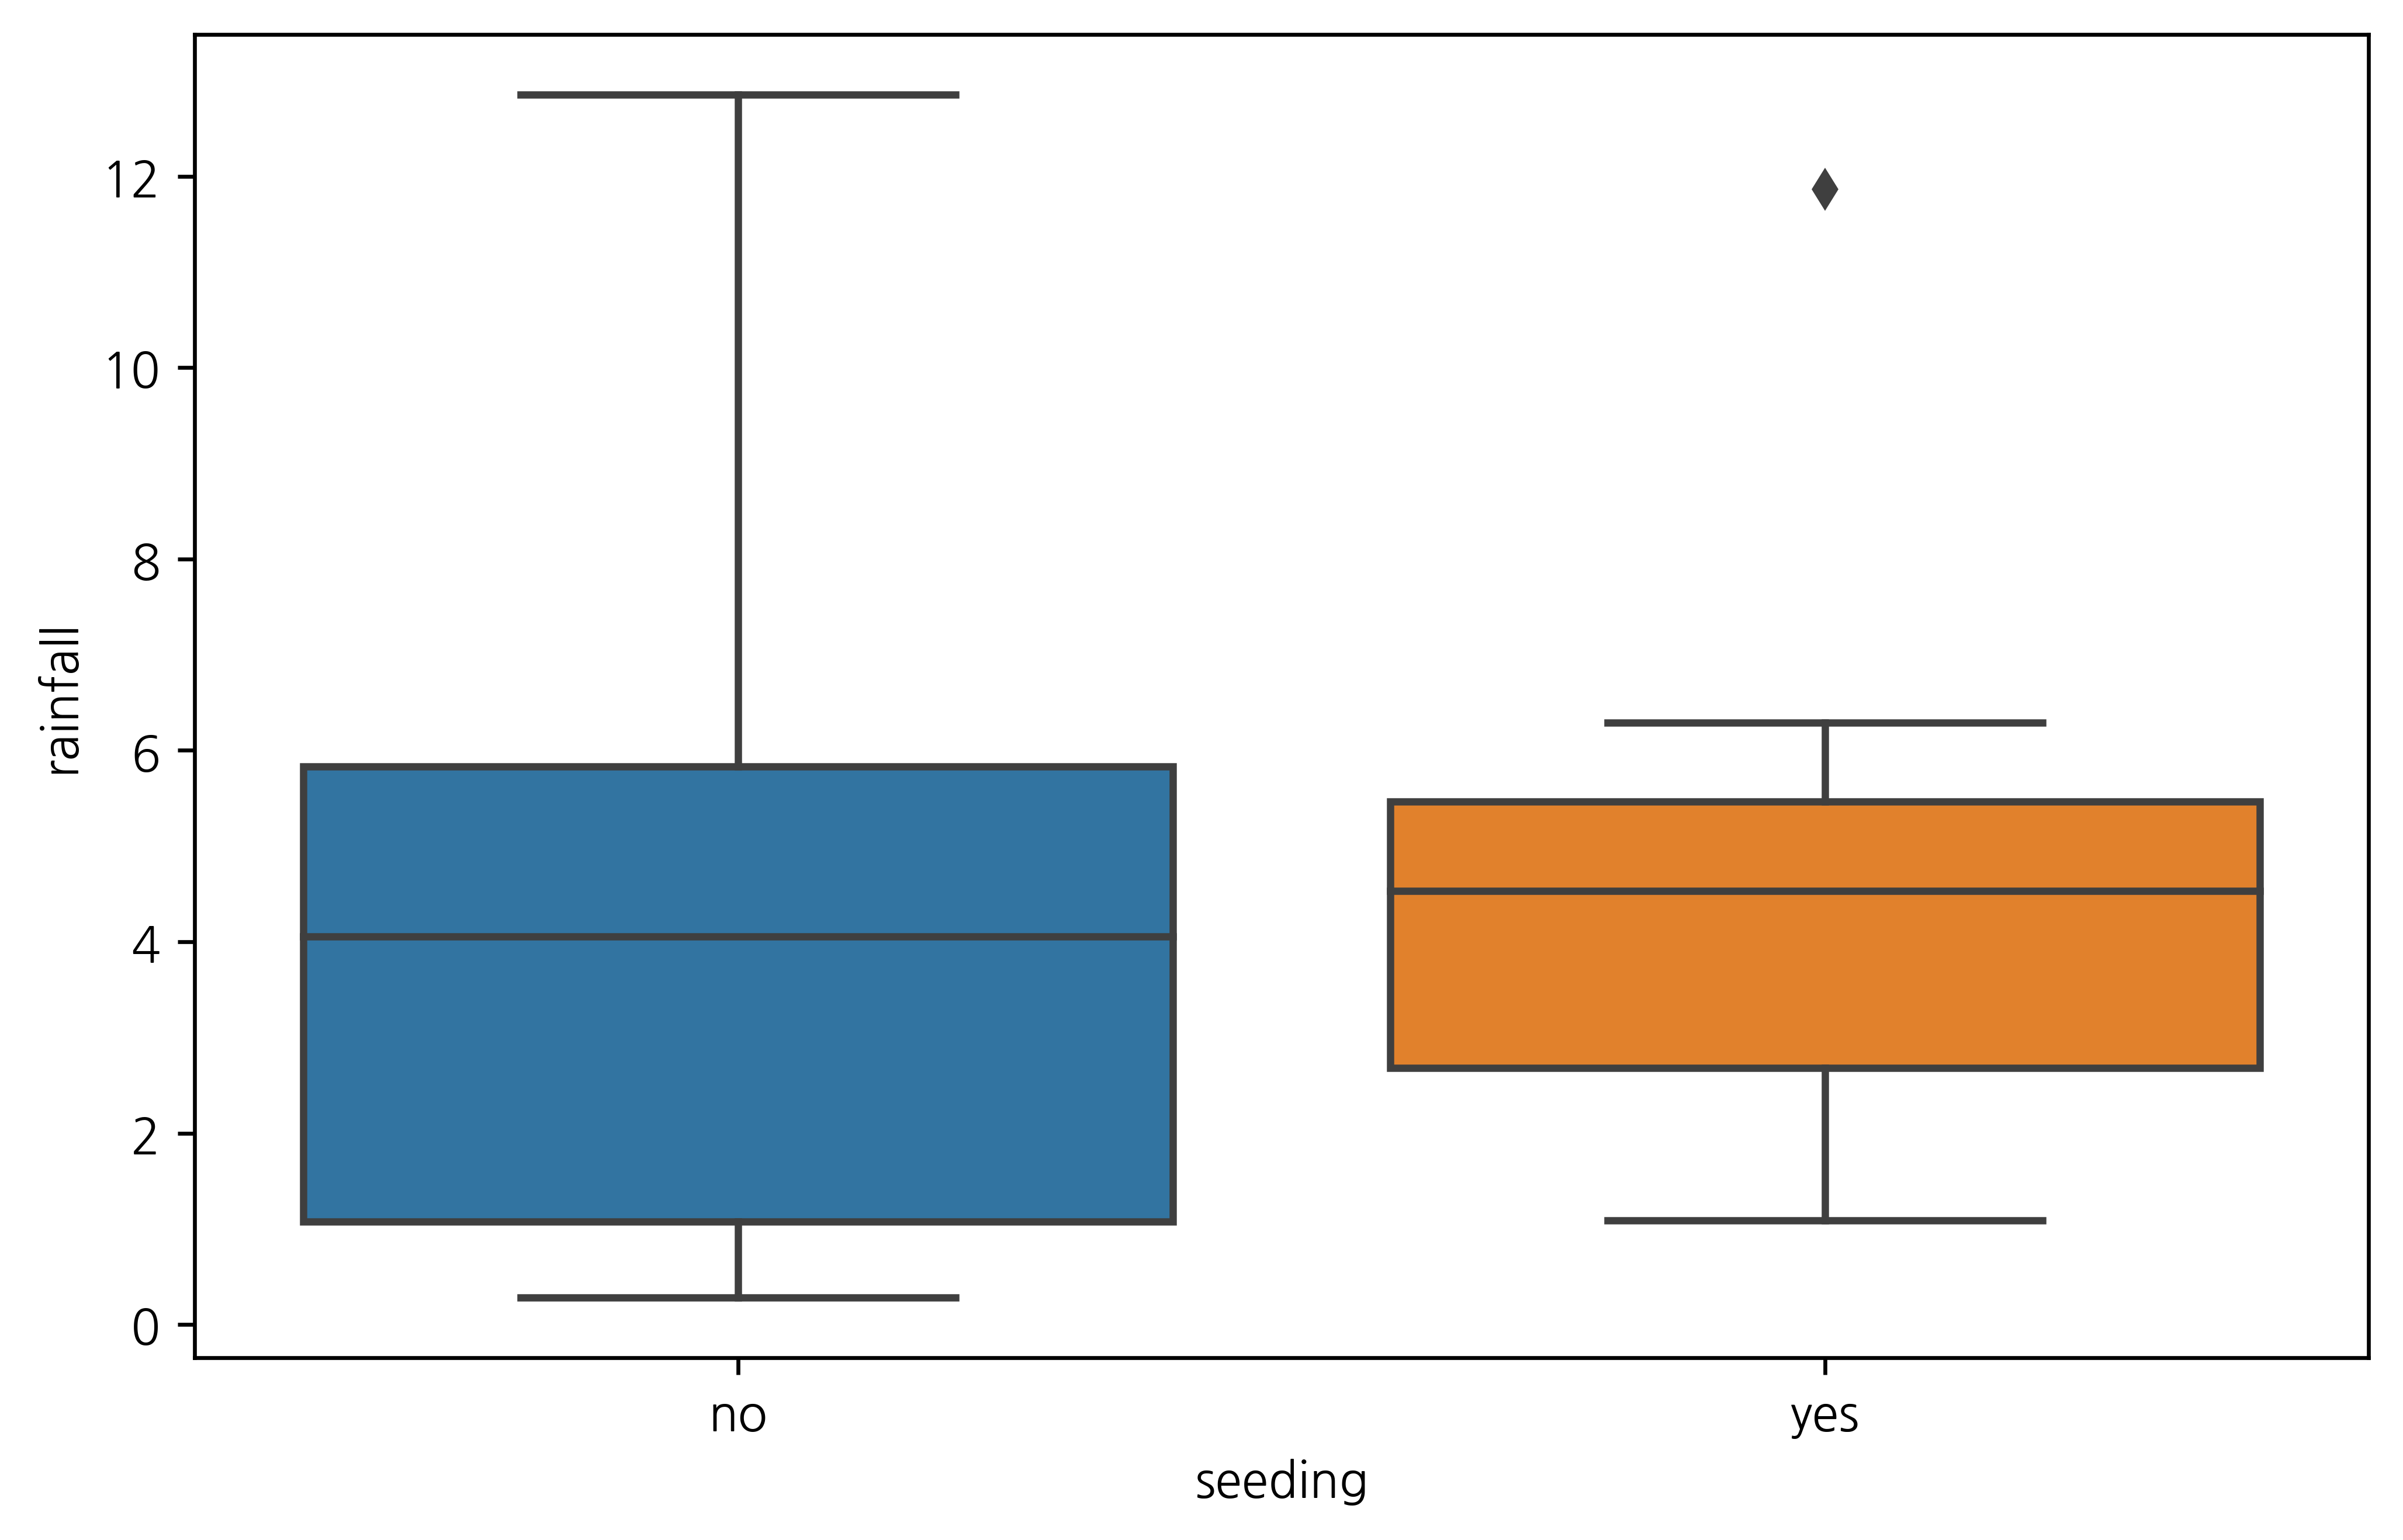

In [6]:
sns.boxplot(x="seeding", y="rainfall", data=df)
plt.show()

In [9]:
# 어노바 분석
model_seeding = sm.OLS.from_formula("rainfall ~ seeding", data=df)
result_seeding = model_seeding.fit()
print(sm.stats.anova_lm(result_seeding))

            df      sum_sq    mean_sq         F  PR(>F)
seeding    1.0    1.283438   1.283438  0.127733  0.7242
Residual  22.0  221.051458  10.047794       NaN     NaN


In [99]:
# 카테고리 변수 a*b = a + b + a:b
formula_interact = "rainfall ~ " + \
"seeding*((scale(time) + scale(sne) + scale(cloudcover) + scale(prewetness) + echomotion))"

model_interact = sm.OLS.from_formula(formula_interact, data = df)
result_interact = model_interact.fit()
print(result_interact.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     3.095
Date:                Sat, 23 May 2020   Prob (F-statistic):             0.0321
Time:                        11:34:00   Log-Likelihood:                -44.630
No. Observations:                  24   AIC:                             113.3
Df Residuals:                      12   BIC:                             127.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [101]:
formula_last = "rainfall ~ scale(time) + seeding:scale(sne)"

model_last = sm.OLS.from_formula(formula_last, data = df)
result_last = model_last.fit()
print(result_last.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     4.090
Date:                Sat, 23 May 2020   Prob (F-statistic):             0.0204
Time:                        11:36:16   Log-Likelihood:                -55.028
No. Observations:                  24   AIC:                             118.1
Df Residuals:                      20   BIC:                             122.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [33]:
dataset = sm.datasets.get_rdataset("Salaries", package="carData")
df = dataset.data[["yrs.since.phd", "salary"]]
df = df.rename(columns={"yrs.since.phd": "experience"})
df.tail()

,experience,salary
392,33,103106
393,31,150564
394,42,101738
395,25,95329
396,8,81035


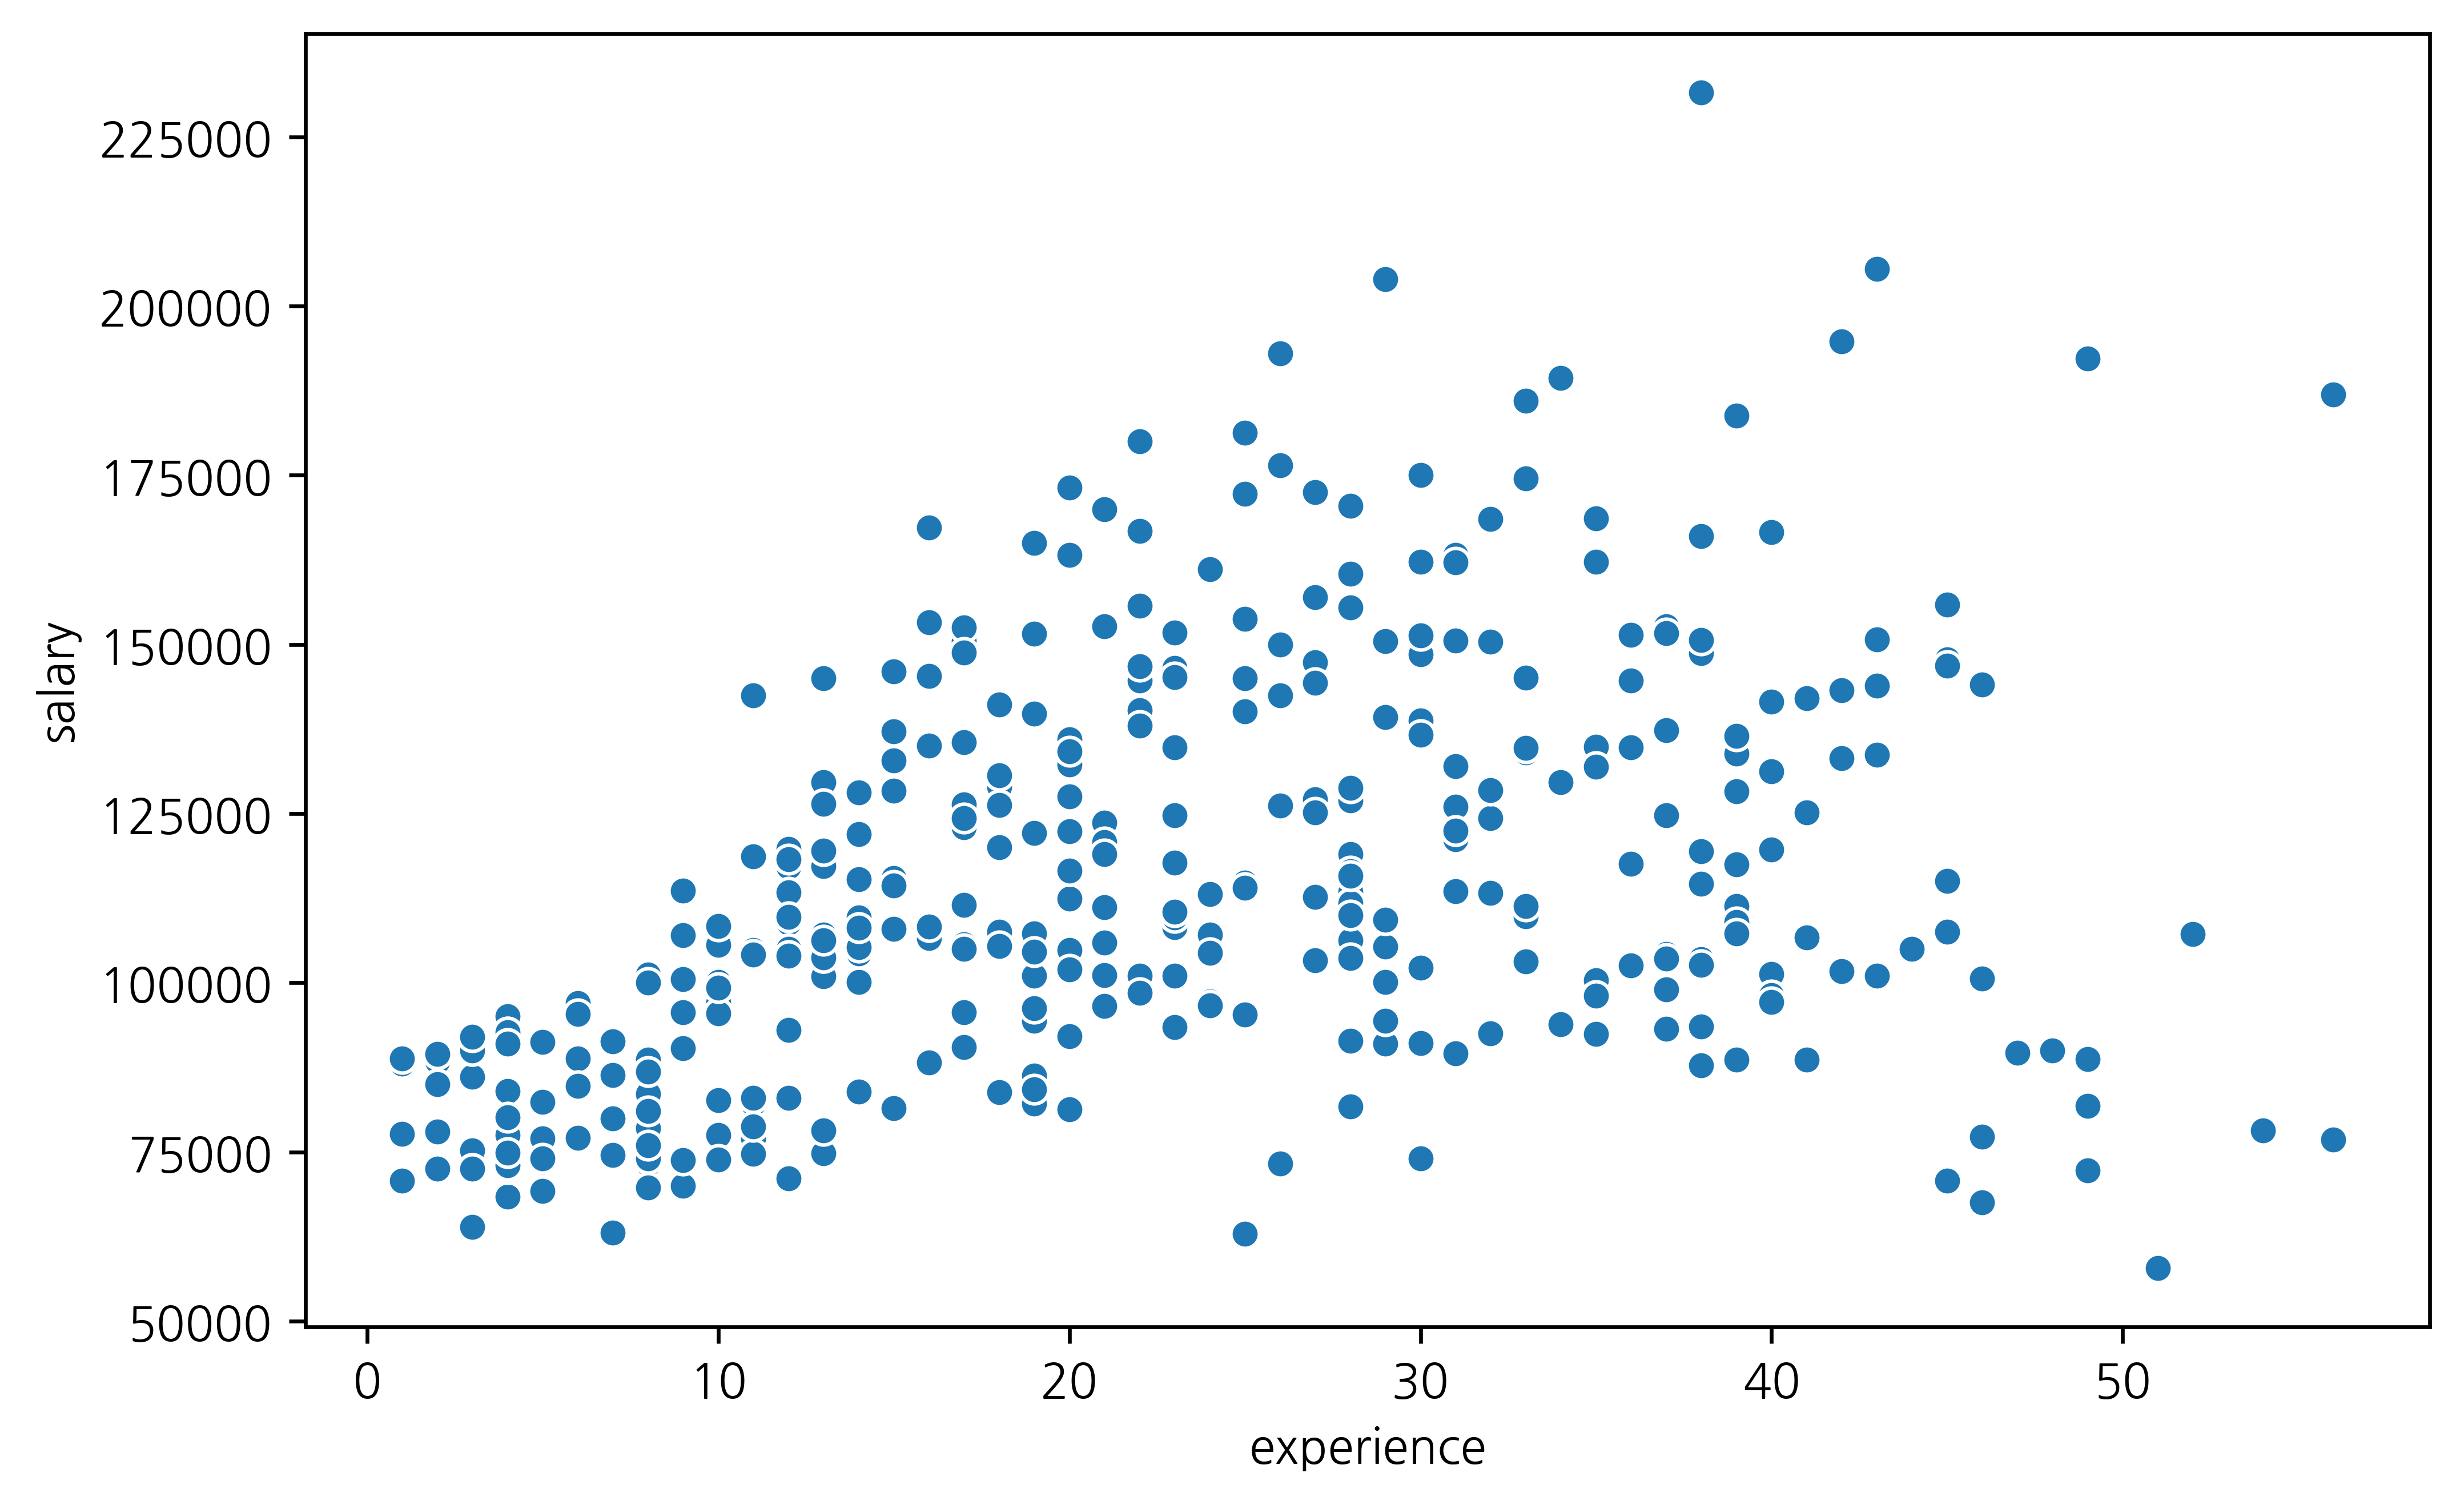

In [34]:
sns.scatterplot(x="experience", y="salary", data=df)
plt.show()

In [42]:
formula_first = "salary ~ experience"

model_first = sm.OLS.from_formula(formula_first, data = df)
result_first = model_first.fit()
print(result_first.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     84.23
Date:                Sat, 23 May 2020   Prob (F-statistic):           2.50e-18
Time:                        09:54:54   Log-Likelihood:                -4620.9
No. Observations:                 397   AIC:                             9246.
Df Residuals:                     395   BIC:                             9254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.172e+04   2765.792     33.162      0.0

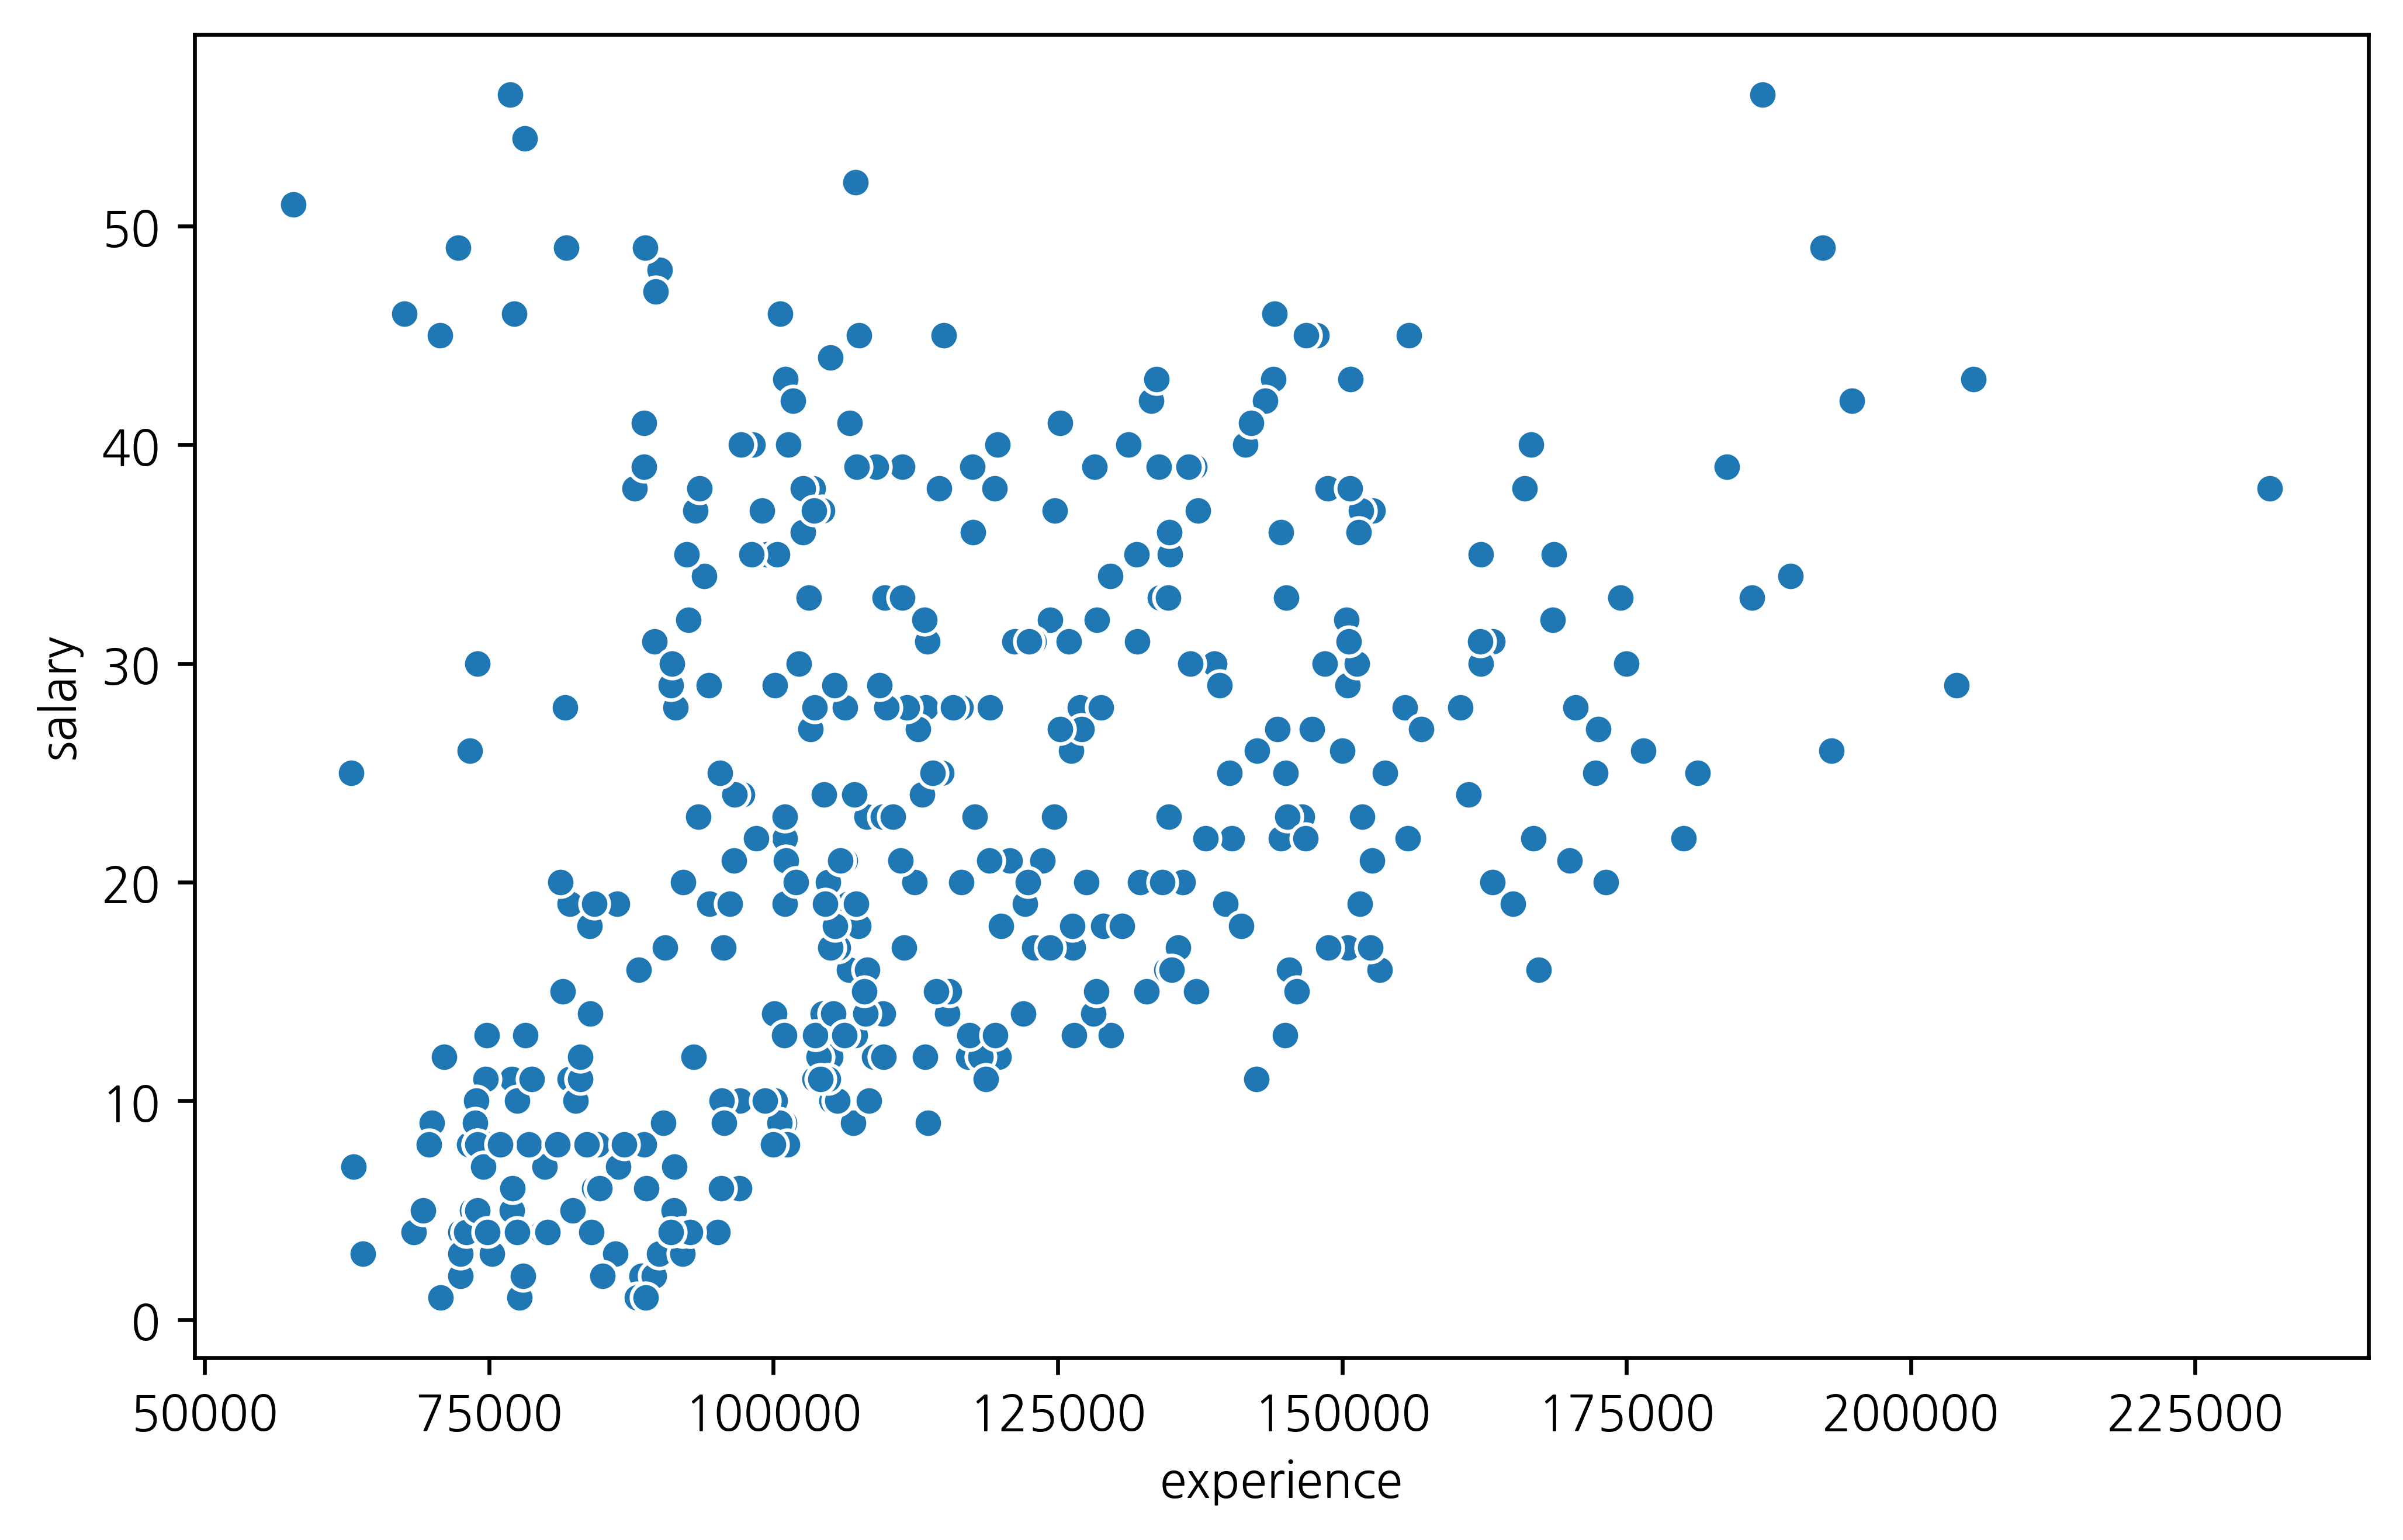

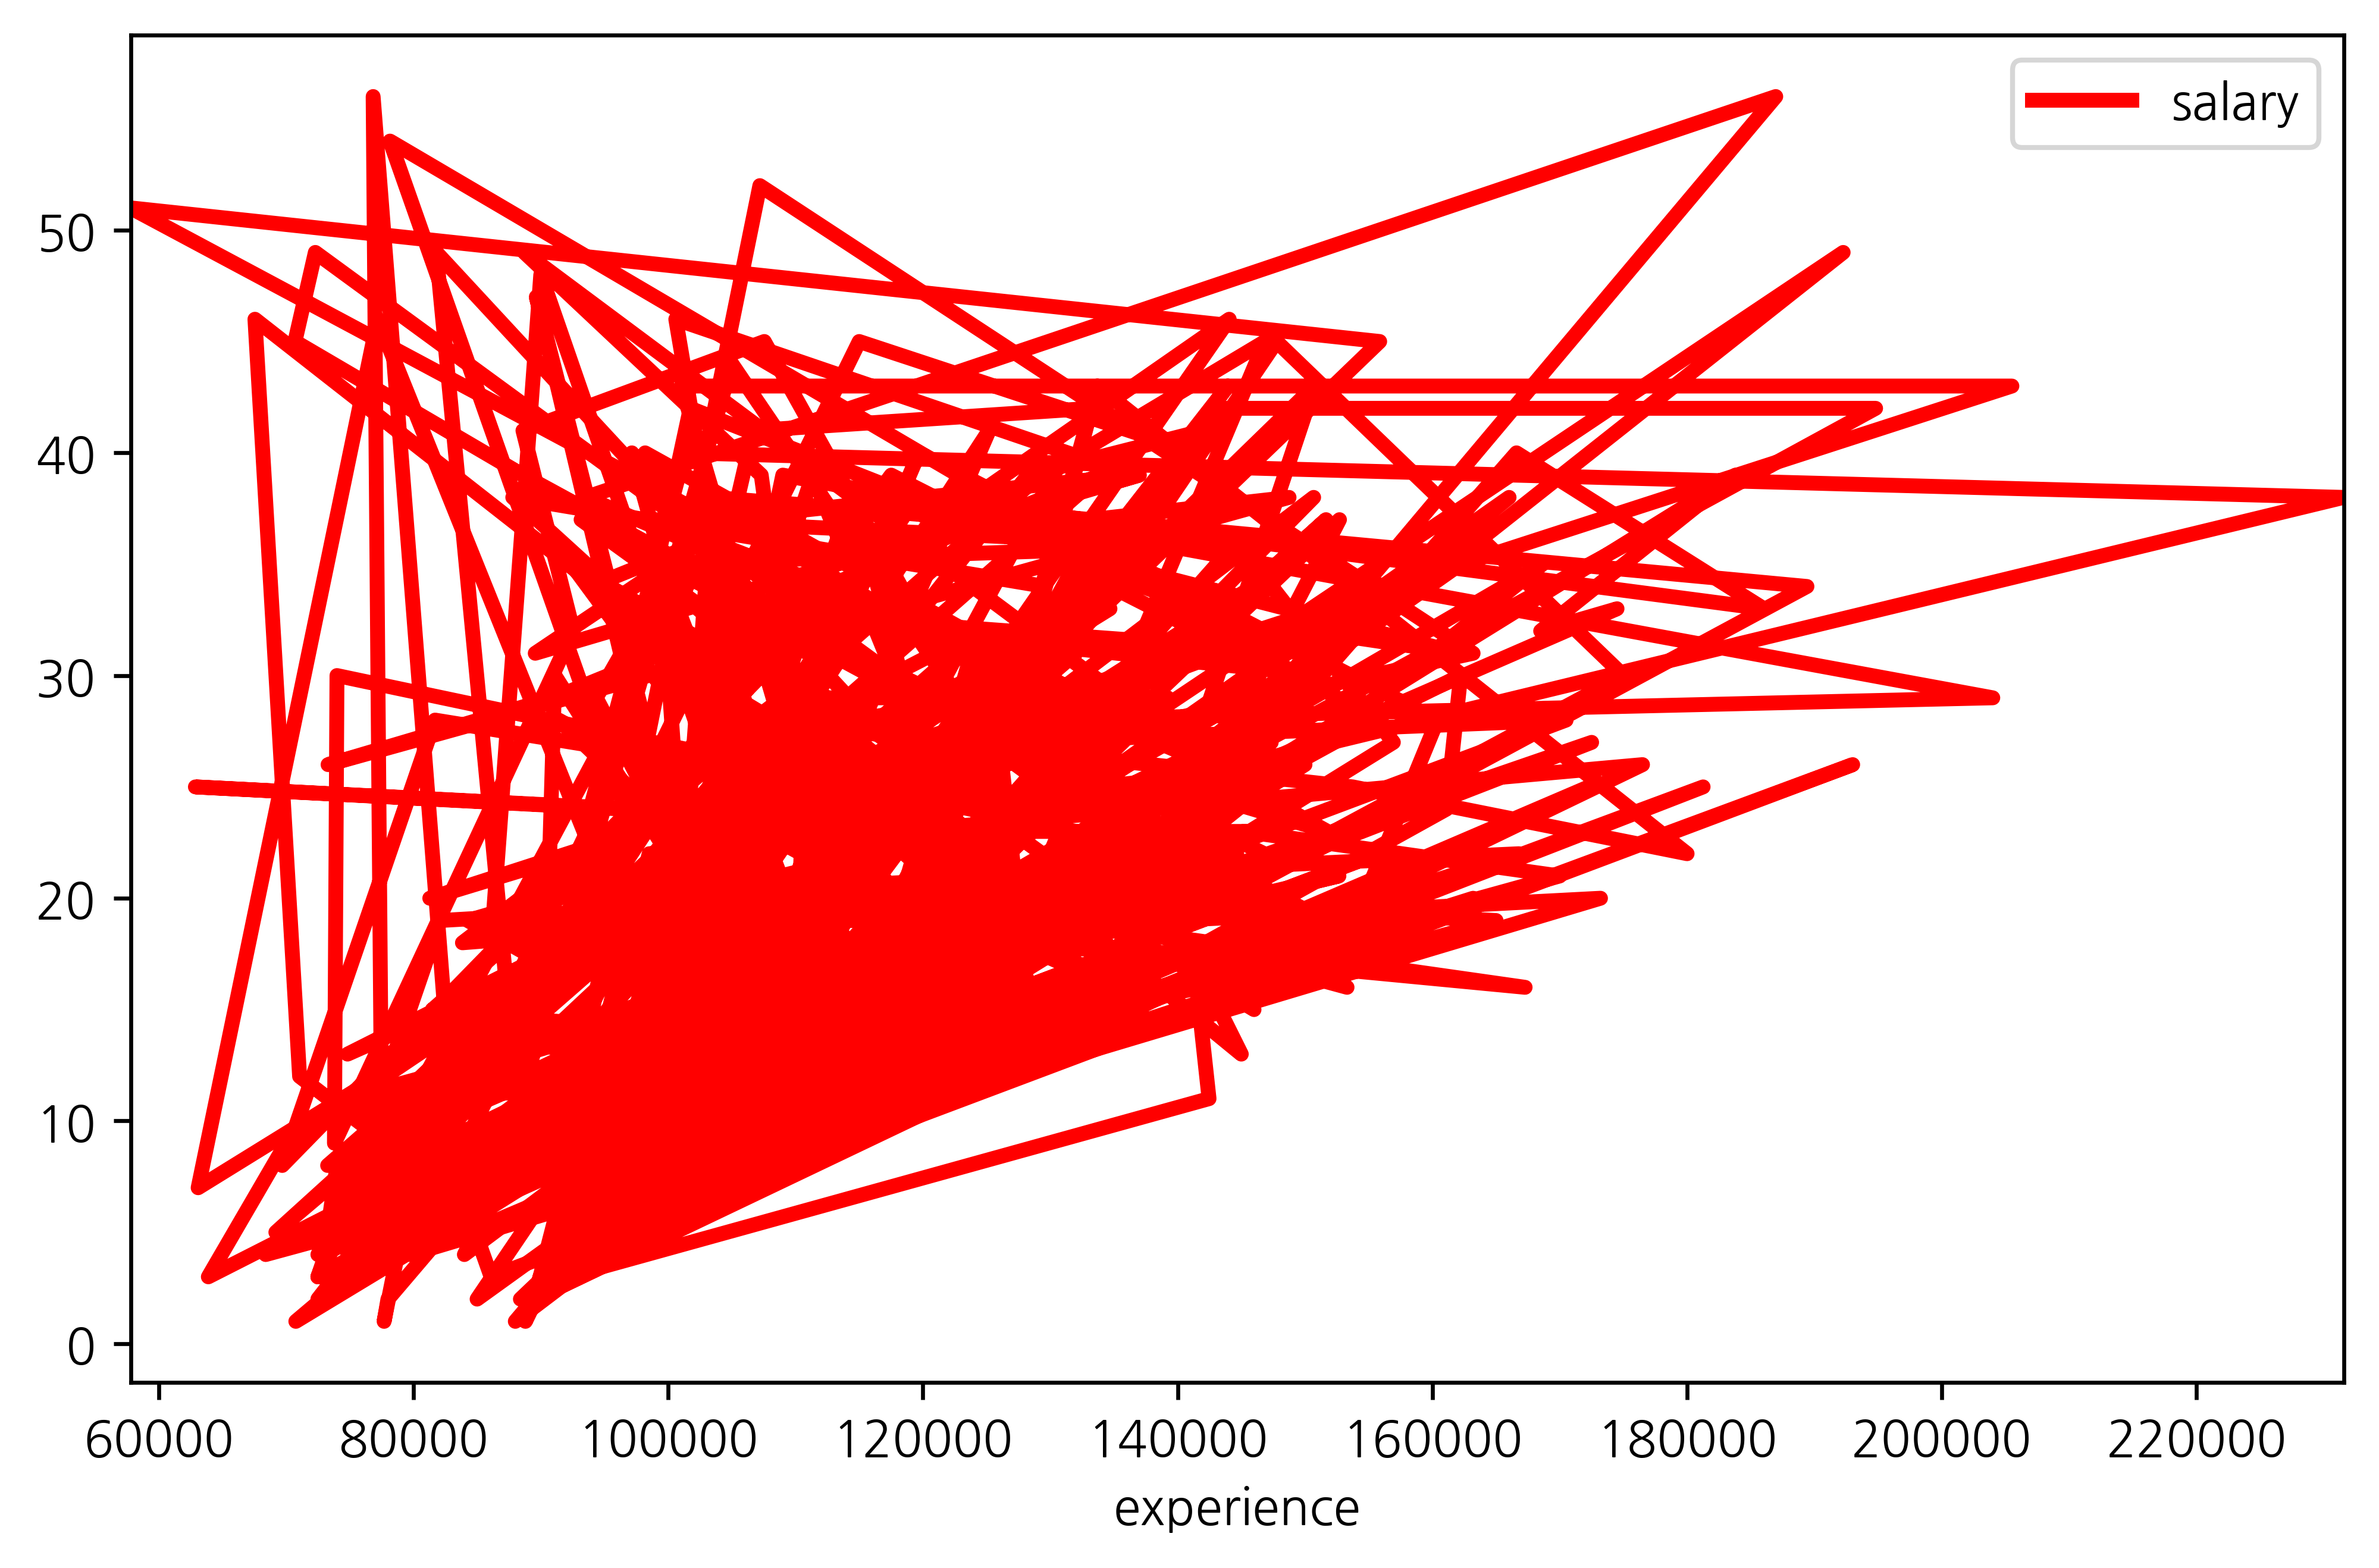

In [55]:
# 위의 그래프에 빨간선 추가해봐
sns.scatterplot(x="experience", y="salary", data=df)
df.plot(x="experience", y="salary", style="r-", lw=3)
plt.show()

In [44]:
formula_2 = "salary ~ experience + I(experience**2)"

model_2 = sm.OLS.from_formula(formula_2, data = df)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     88.95
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.32e-32
Time:                        09:59:56   Log-Likelihood:                -4585.3
No. Observations:                 397   AIC:                             9177.
Df Residuals:                     394   BIC:                             9189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.505e+04   3949

In [ ]:
# 위의 그래프에 빨간선 추가해봐

In [ ]:
# 연봉만 양수만 나오기 때문에 위의 그래프에서 윗쪽의 분포가 아랫쪽의 분포보다 많이나옴. 그래서 Y에 로그를 취함

In [46]:
formula_3 = "np.log(salary) ~ experience + I(experience**2)"

model_3 = sm.OLS.from_formula(formula_3, data = df)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.87e-38
Time:                        10:03:24   Log-Likelihood:                 59.232
No. Observations:                 397   AIC:                            -112.5
Df Residuals:                     394   BIC:                            -100.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.1547      0

In [56]:
mtcars

NameError: name 'mtcars' is not defined

In [58]:
mtcars = sm.datasets.get_rdataset("mtcars")
df = mtcars.data
df.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [59]:
print(mtcars.__doc__)

+--------+-----------------+
| mtcars | R Documentation |
+--------+-----------------+

Motor Trend Car Road Tests
--------------------------

Description
~~~~~~~~~~~

The data was extracted from the 1974 *Motor Trend* US magazine, and
comprises fuel consumption and 10 aspects of automobile design and
performance for 32 automobiles (1973–74 models).

Usage
~~~~~

::

   mtcars

Format
~~~~~~

A data frame with 32 observations on 11 (numeric) variables.

+-------+------+------------------------------------------+
| [, 1] | mpg  | Miles/(US) gallon                        |
+-------+------+------------------------------------------+
| [, 2] | cyl  | Number of cylinders                      |
+-------+------+------------------------------------------+
| [, 3] | disp | Displacement (cu.in.)                    |
+-------+------+------------------------------------------+
| [, 4] | hp   | Gross horsepower                         |
+-------+------+------------------------------------------+
| 

In [61]:
formula0 = "mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb"
model0 = sm.OLS.from_formula(formula0, data=df)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 23 May 2020   Prob (F-statistic):           3.79e-07
Time:                        10:24:59   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

In [88]:
# 실린더, 기어, 카브와 같은 갯수는 사실 카테고리임. 근데 상황에 따라 스케일링해서 실수로 해두됨
formula1 = "mpg ~ scale(cyl) + scale(disp) + I(scale(disp) ** 2) + scale(hp) + I(scale(hp) ** 2) + scale(drat) + scale(wt) + C(vs) + C(am) + scale(gear) + scale(carb)"
model1 = sm.OLS.from_formula(formula1, data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     17.95
Date:                Sat, 23 May 2020   Prob (F-statistic):           5.16e-08
Time:                        11:17:56   Log-Likelihood:                -64.197
No. Observations:                  32   AIC:                             152.4
Df Residuals:                      20   BIC:                             170.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.7517    

In [95]:
#am, 오토인지 아닌지가 기울기에 영향을 미치는지 봐라
formula2 = "mpg ~ " + \
    "C(am)*(scale(cyl) + scale(disp) + scale(hp) + scale(drat) + scale(wt) + scale(gear) + scale(carb))"
model2 = sm.OLS.from_formula(formula2, data=df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     15.64
Date:                Sat, 23 May 2020   Prob (F-statistic):           8.40e-07
Time:                        11:29:07   Log-Likelihood:                -58.359
No. Observations:                  32   AIC:                             148.7
Df Residuals:                      16   BIC:                             172.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 20

In [90]:
formula4 = "mpg ~ " + \
    "scale(wt) + C(am):(scale(wt) + scale(qsec))"
model4 = sm.OLS.from_formula(formula4, data=df)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     57.37
Date:                Sat, 23 May 2020   Prob (F-statistic):           8.28e-13
Time:                        11:25:09   Log-Likelihood:                -66.359
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               18.6713 

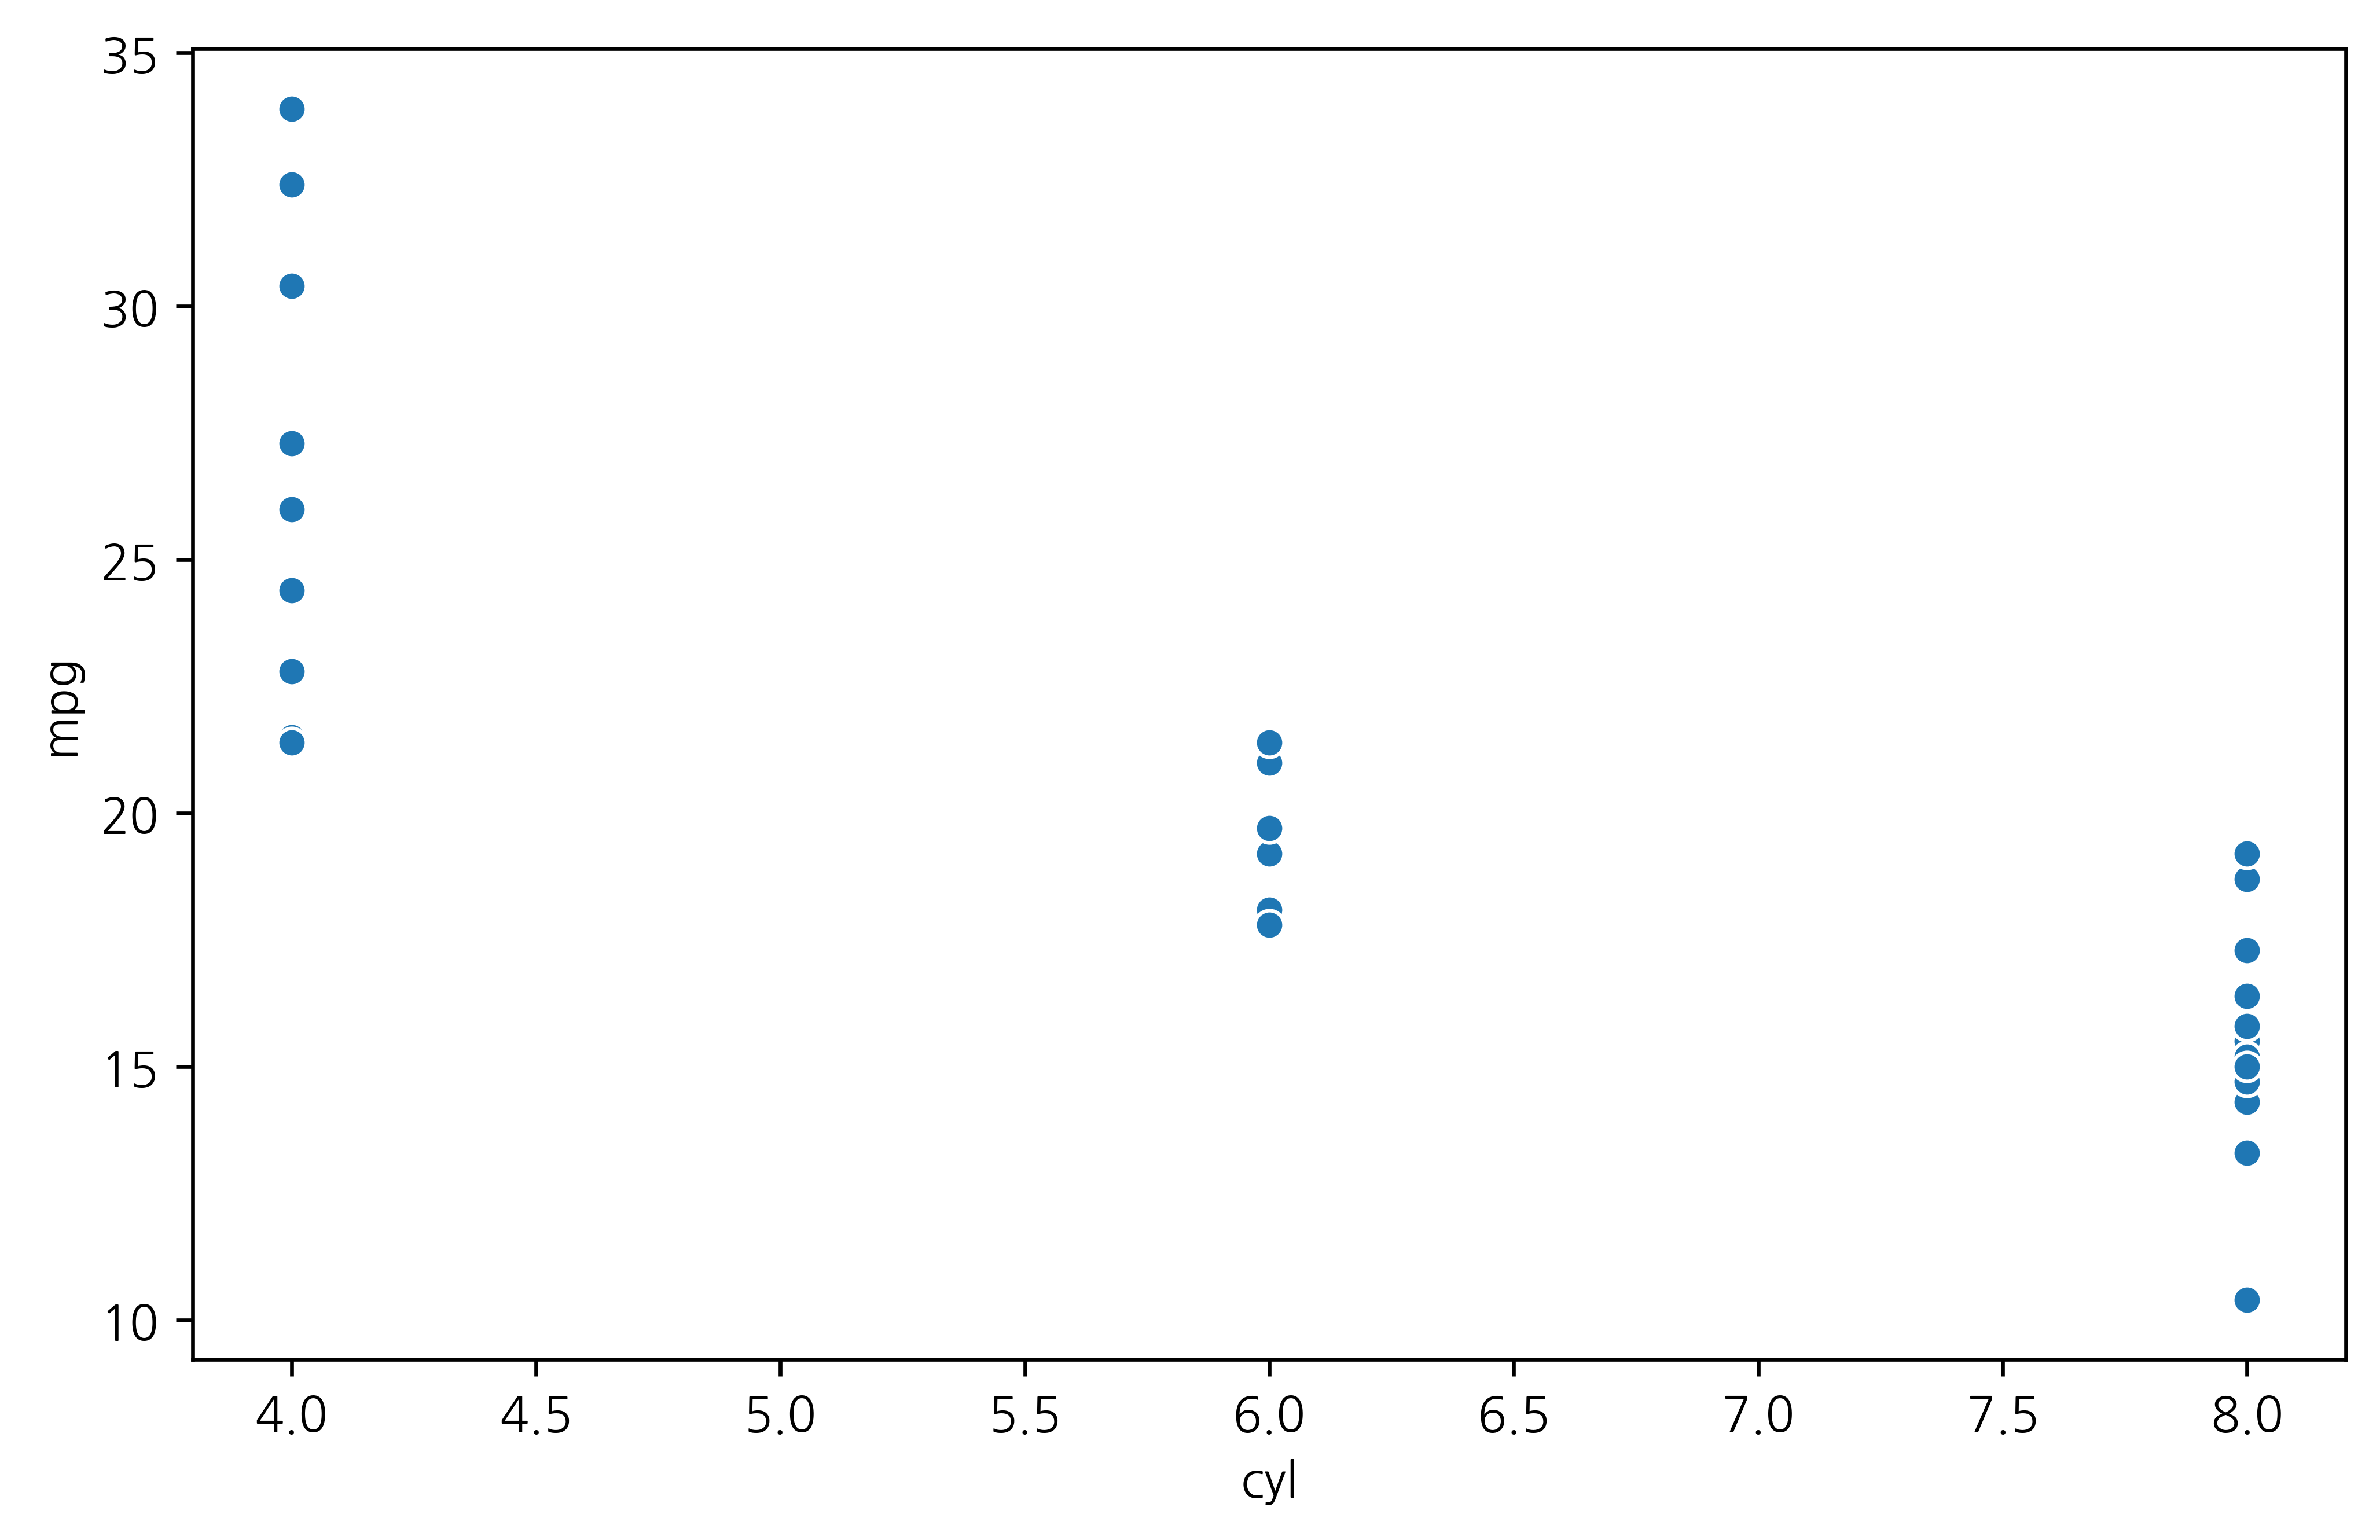

In [66]:
sns.scatterplot(x="cyl", y="mpg", data=df)
plt.show()

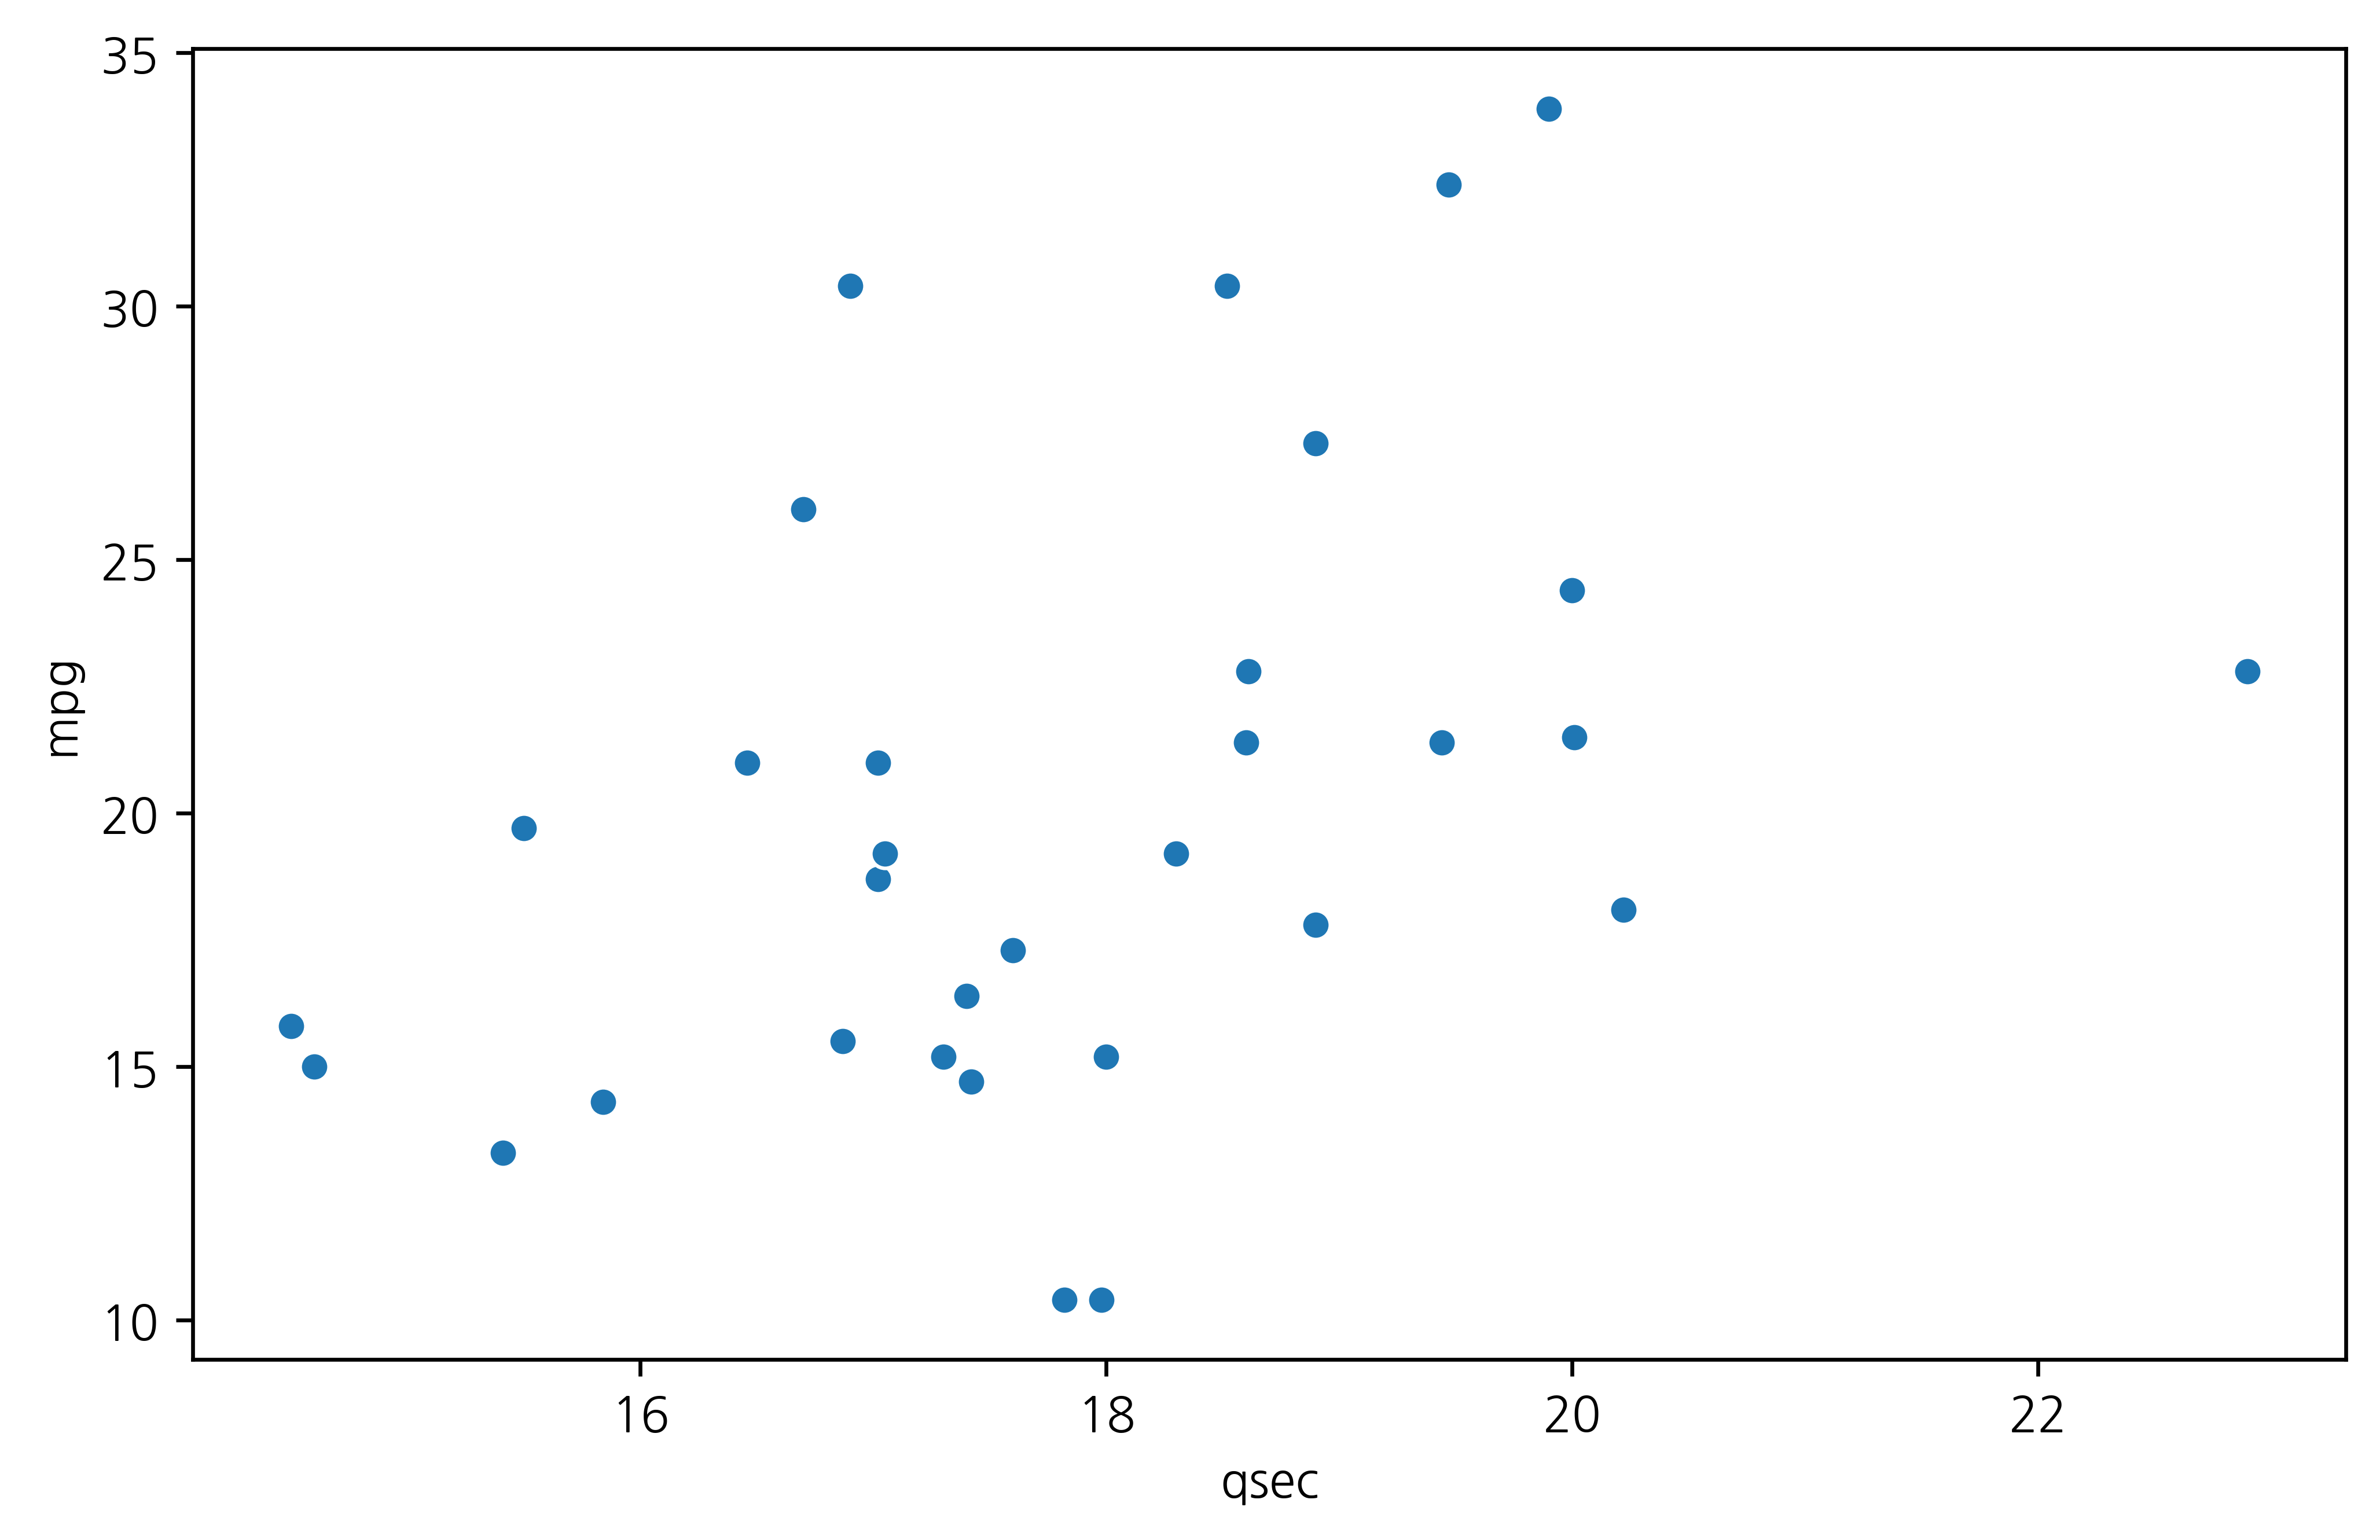

In [83]:
sns.scatterplot(x="qsec", y="mpg", data=df)
plt.show()

In [103]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
docs = list(zip(*data))[1]
docs

('아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [104]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

In [108]:
hannanum.morphs(docs[0])

['아', '더빙', '..', '진짜', '짜증나', '네', '요', '목소리']

In [136]:
tagger = Okt()

def tokenize(doc):
    tokens = [t for t in tagger.nouns(doc)]
    return tokens

In [137]:
tokenize(docs[0])

['더빙', '진짜', '목소리']

In [113]:
#tqdm은 오래걸리는 코딩 진행사항을 보여줌
from tqdm import tqdm
sentences = []
for d in tqdm(docs[:10000]):
    sentences.append(tokenize(d))

100%|██████████| 10000/10000 [00:24<00:00, 415.47it/s]


In [138]:
# 포문 말고 리스트 컴프리핸션 써!!
sentences = [tokenize(d) for d in docs[:10000]]

In [122]:
words = []
for sentence in sentences:
    for word in sentence:
        words.append(word)

In [139]:
words = [word for sentence in sentences for word in sentence]

In [140]:
from nltk import FreqDist
fd = FreqDist(words)

In [141]:
fd.most_common(10)

[('영화', 3363),
 ('정말', 660),
 ('진짜', 549),
 ('점', 548),
 ('이', 543),
 ('연기', 441),
 ('평점', 424),
 ('최고', 418),
 ('것', 413),
 ('스토리', 359)]

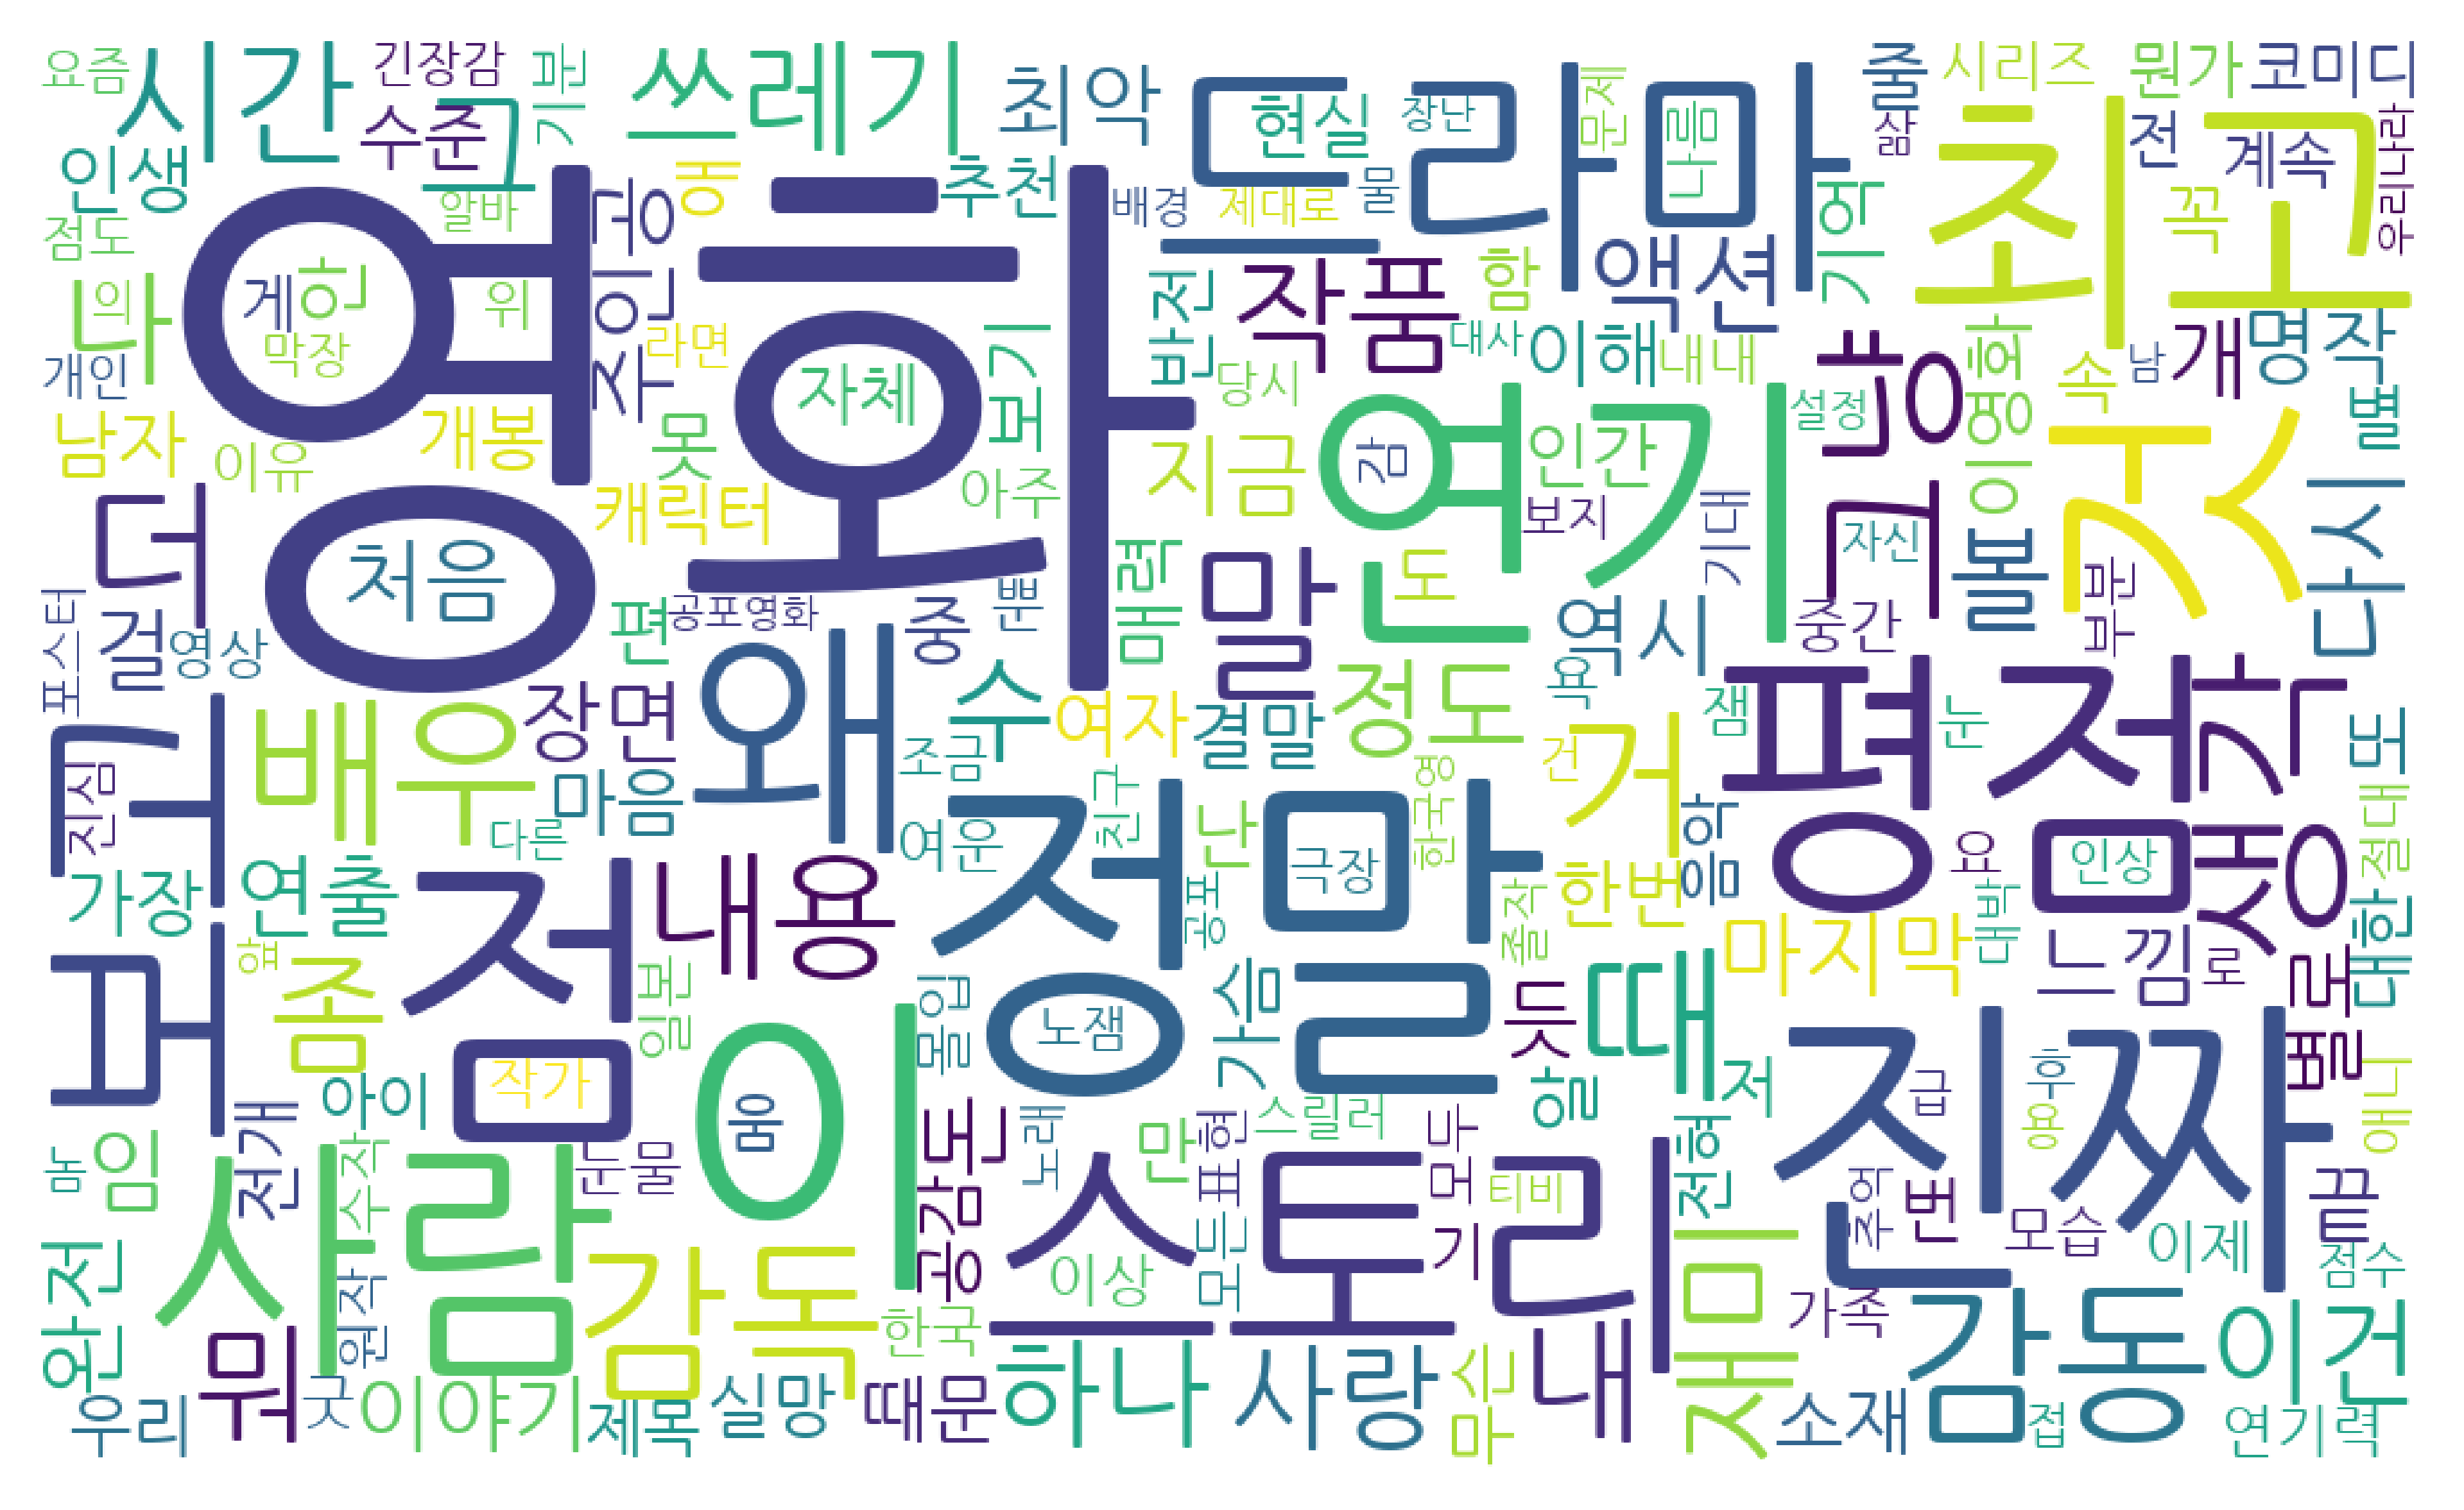

In [147]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 ttf 폰트 경로를 설정
font_path = 'c/windows/fonts/NanumGothic.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(fd))
plt.axis("off")
plt.show()